# 2. k-Nearest Neighbors (kNN)
이번 시간에는 kNN 알고리즘에 대해 실습해 봅시다.

가장 먼저, 필요한 모듈들을 import 합시다.

In [1]:
#ignore this
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import operator

## 데이터셋 다루기
간단한 데이터셋을 만드는 함수를 작성합니다.

In [2]:
def createDataSet():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    
    return group, labels

group, labels = createDataSet()

데이터셋이 어떻게 생겼을까요?

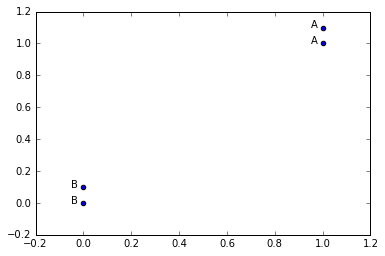

In [3]:
x = group[:, 0]
y = group[:, 1]

plt.scatter(x, y)

# margin for labels
margin = 0.05
# annotate each of the points
for i, label in enumerate(labels):
    plt.annotate(label, (x[i] - margin, y[i]))

plt.show()

위와 같이, 우리가 다루게 될 데이터셋은 각 점들의 좌표를 나타내는 <b>벡터</b>와 각각에 해당하는 <b>라벨</b>들로 구성되어 있습니다.

## kNN 알고리즘 구현
Pseudocode는 아래와 같습니다.

<i>
1. 데이터셋의 각 점 <b>P</b>에 대해서:<br/>
    Classify하고자 하는 입력 벡터 (<b>inX</b>)와 P 사이의 거리를 구합니다.

2. 구한 거리들을 오름차순으로 정렬합니다.
3. 거리가 가장 작은 k개의 점들을 취합니다.
4. 각 점의 label은 우리가 이미 알고 있으므로, 취한 k개의 점들 중 어떤 label이 가장 많은지 알 수 있습니다.
5. 가장 많은 label을 return합니다.
</i>

간단하죠?

실제로 구현해봅시다.

In [4]:
def classify0(inX, dataSet, labels, k):
    # 1. 데이터셋의 각 점 P 에 대해서 inX와 P 사이의 거리를 구합니다.
    
    dataSetSize = dataSet.shape[0] # dataSet의 각각의 행은 하나의 점을 나타냅니다. 따라서 행의 개수는 점의 개수와 같습니다.
    
    # np.tile(vec, shape) 함수는 타일을 붙이듯이 vec을 붙여넣는 함수입니다. shape가 (n, m) 꼴이라고 하면,
    # vec을 세로로 n번, 가로로 m번 복사-붙여넣기 하여 만들어진 2차원 array를 return합니다.
    # 그러면 np.tile(inX, (dataSetSize, 1))은 inX를 세로로 dataSetSize만큼 복사-붙여넣기 한 2차원 array가 됩니다.
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    
    sqDistances = sqDiffMat.sum(axis=1) # axis = 1은, 행 방향으로 sum을 구하겠다는 의미입니다.
    distances = sqDistances ** 0.5
    
    # 2. 구한 거리들을 오름차순으로 정렬합니다.
    sortedDistIndices = distances.argsort() 
    
    # 3~5. 거리가 가장 작은 k개의 점들에 대해서 가장 많은 label을 return합니다.
    
    classCount = {} # 각 label에 대한 vote 수가 저장될 dictionary {label1:vote1, label2:vote2, ....}
    for i in range(k):
        voteIlabel = labels[sortedDistIndices[i]] # 이 점의 label을 구해서
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1 # dictionary에 1을 더합니다.
        
    # classCount.items() : dictionary의 각 key, value들을 [(k1, v1), (k2, v2), (k3, v3), ...] 형태로 반환합니다.
    # 주의 : python2에서는 .iteritems()였던 것이 python3에 오면서 .items()로 바뀌었습니다.
    # operator.itemgetter(1) : tuple이나 list가 argument로 주어지면 index 1의 요소를 반환하는 함수입니다.
    # reverse = True : 내림차순으로 정렬합니다. default는 reverse=False로, 오름차순 정렬입니다.
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    
    # sortedClassCount[0] 은 가장 vote 수가 많은 label을 (label, vote) 형태로 나타낸 tuple입니다.
    # 따라서 sortedClassCount[0][0] 은 가장 vote 수가 많은 label을 반환합니다.
    return sortedClassCount[0][0]

간단하게 테스트 해봅시다. 아까 우리의 데이터셋을 다시 봅시다.

In [5]:
print(group)
print(labels)

[[ 1.   1.1]
 [ 1.   1. ]
 [ 0.   0. ]
 [ 0.   0.1]]
['A', 'A', 'B', 'B']


In [6]:
# want my input to be classified as B
myInput = np.array([0.2, 0.0])

print("Your input (%.2f, %.2f) is classified as %s" % (myInput[0], myInput[1], classify0(myInput, group, labels, 2)))

Your input (0.20, 0.00) is classified as B


자유롭게 테스트해보세요.

x = 1.0
y = 0.5
Your input (1.00, 0.50) is classified as A


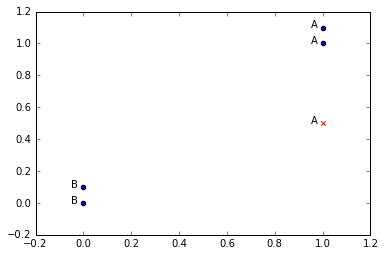

In [7]:
myX = eval(input("x = "))
myY = eval(input("y = "))
myClass = classify0(np.array([myX, myY]), group, labels, 2)
print("Your input (%.2f, %.2f) is classified as %s" % (myX, myY, myClass))

x = group[:, 0]
y = group[:, 1]

plt.scatter(x, y)

# margin for labels
margin = 0.05
# annotate each of the points
for i, label in enumerate(labels):
    plt.annotate(label, (x[i] - margin, y[i]))

plt.scatter(myX, myY, marker="x", color="r")
plt.annotate( myClass, (myX - margin, myY))
plt.show()

어디를 경계로 class가 나누어지는지 궁금해집니다.

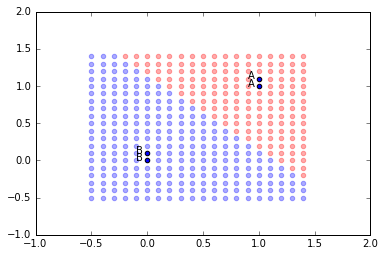

In [8]:
# plot settings
xMin = -0.5
xMax = 1.5
yMin = -0.5
yMax = 1.5
space = 0.1 # DO NOT CHANGE THIS
colorDic = {"A":"red", "B":"blue"} # 'A' points in red, 'B' points in blue

# generate points to classify
points = [np.array([x, y]) for x in np.arange(xMin, xMax, space) for y in np.arange(yMin, yMax, space)]

# classify each of the points
pointLabels = [classify0(point, group, labels, 2) for point in points]

for i, point in enumerate(points):
    plt.scatter(point[0], point[1], color=colorDic[pointLabels[i]], alpha=0.33)
    
x = group[:, 0]
y = group[:, 1]

plt.scatter(x, y)

# margin for labels
margin = 0.1
# annotate each of the points
for i, label in enumerate(labels):
    plt.annotate(label, (x[i] - margin, y[i]))

plt.show()

## 예제 : 소개팅 사이트
헬렌은 여태껏 소개팅 사이트로 1000명의 이성을 만났습니다(!). 하지만 헬렌은 그들 모두가 마음에 들지는 않았죠. 호감의 정도를 대충 3개의 카테고리로 나눌 수 있었습니다.

1. 마음에 들지 않음 (didntLike)
2. 조금 좋음 (smallDoses)
3. 매우 좋음 (largeDoses)

소개팅 사이트에서 제공되는 정보는 아니지만, 헬렌은 그 1000명에 대해서 상대를 판단하는데 중요하다고 생각되는 3개의 요소를 기록해 두었다고 합니다.

1. 1년 간 얻는 항공 마일리지
2. 비디오 게임을 하며 보내는 시간의 비율(%)
3. 한 주에 먹는 아이스크림의 양(L)

헬렌이 우리에게 부탁해왔습니다. "이 정보들을 사용해서, 자기가 그 사람을 얼마나 좋아할지 예측해주는 프로그램을 만들어 주세요!"

먼저, 데이터셋이 어떻게 생겼는지 알아봅시다.

In [9]:
with open("./datasets/datingTestSet.txt") as data:
    # show top 10 lines
    for i in range(10):
        print(data.readline().strip().split("\t"))

['40920', '8.326976', '0.953952', 'largeDoses']
['14488', '7.153469', '1.673904', 'smallDoses']
['26052', '1.441871', '0.805124', 'didntLike']
['75136', '13.147394', '0.428964', 'didntLike']
['38344', '1.669788', '0.134296', 'didntLike']
['72993', '10.141740', '1.032955', 'didntLike']
['35948', '6.830792', '1.213192', 'largeDoses']
['42666', '13.276369', '0.543880', 'largeDoses']
['67497', '8.631577', '0.749278', 'didntLike']
['35483', '12.273169', '1.508053', 'largeDoses']


데이터셋을 2d array와 label로 파싱합니다. (편의상 2d array를 matrix로 부르겠습니다.)

In [10]:
def file2matrix(filePath):
    matrix = []
    labels = []
    with open(filePath) as data:
        for line in data.readlines():
            # split each line with tab
            tokens = line.strip().split("\t")
            # append row to matrix (except last token (= label))
            matrix.append([eval(t) for t in tokens[:-1]])
            # append label to labels
            labels.append(tokens[-1])
        # END OF FOR - line
    # END OF WITH - data

    # convert to numpy 2darray
    matrix = np.array(matrix)
    labels = np.array(labels)
    
    return matrix, labels

matrix, labels = file2matrix("./datasets/datingTestSet.txt")

print(matrix[:3, :])
print(labels[:3])

[[  4.09200000e+04   8.32697600e+00   9.53952000e-01]
 [  1.44880000e+04   7.15346900e+00   1.67390400e+00]
 [  2.60520000e+04   1.44187100e+00   8.05124000e-01]]
['largeDoses' 'smallDoses' 'didntLike']


데이터셋이 어떻게 생겼는지 알아봅시다.

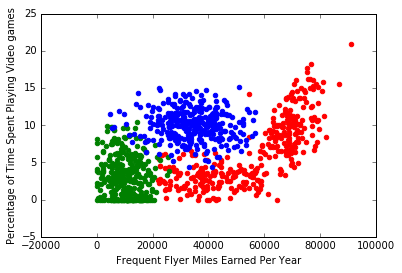

In [11]:
def plotDataSet(x, y):
    columns = ["Frequent Flyer Miles Earned Per Year" , "Percentage of Time Spent Playing Video games", "Liters of Ice Cream Consumed per Week"]
    didntLikeMask = (labels == "didntLike")
    smallDosesMask = (labels == "smallDoses")
    largeDosesMask = (labels == "largeDoses")

    # plot didn't like in red points
    plt.scatter(matrix[didntLikeMask, x], matrix[didntLikeMask, y], color="red")
    # plot small doses in green points
    plt.scatter(matrix[smallDosesMask, x], matrix[smallDosesMask, y], color="green")
    # plot large doses in blue points
    plt.scatter(matrix[largeDosesMask, x], matrix[largeDosesMask, y], color="blue")

    plt.xlabel(columns[x])
    plt.ylabel(columns[y])

    plt.show()

plotDataSet(0, 1)

kNN을 실행하기 전에, 우리의 데이터셋에 kNN을 잘 적용하기 위해서 데이터셋을 normalize해야 합니다.
<br/>matrix를 주면, normalize를 해주는 함수를 만들어 봅시다.

In [12]:
def autoNorm(matrix):
    # 각 열에 대해서(axis = 0), 최솟값, 최댓값을 구합니다.
    minVals = matrix.min(axis=0)
    maxVals = matrix.max(axis=0)
    # 각 열에 대해서 최댓값과 최솟값의 차이를 구합니다.
    ranges = maxVals - minVals
    
    # m : matrix의 행의 개수
    m = matrix.shape[0]
    
    # (normalize된 값) = (원래 값 - 행의 최솟값) / (행의 최댓값 - 행의 최솟값)
    normMatrix = matrix - np.tile(minVals, (m, 1))
    normMatrix = matrix / np.tile(ranges, (m, 1))
    
    return normMatrix, ranges, minVals

normalize 합니다.

In [13]:
normMatrix, ranges, minVals = autoNorm(matrix)

print(normMatrix[:3, :])
print(labels[:3])

# 모든 값들이 0과 1 사이로 normalize된 것을 확인할 수 있습니다.

[[ 0.44832535  0.39805139  0.56301579]
 [ 0.15873259  0.34195467  0.98792642]
 [ 0.28542943  0.06892523  0.47517855]]
['largeDoses' 'smallDoses' 'didntLike']


이제 우리의 kNN classifier가 얼마나 잘 작동하는지 알아봅시다.

In [16]:
def datingClassTest(k):
    testRatio = 0.10 # 데이터셋 중 10%를 테스트셋으로 활용할 것입니다.
    
    # dataset을 파싱하고 normalize합니다.
    matrix, labels = file2matrix("./datasets/datingTestSet.txt")
    normMatrix, ranges, minVals = autoNorm(matrix)
    
    dataSetSize = normMatrix.shape[0] # 데이터셋 행의 개수
    testSetSize = int(testRatio * dataSetSize) # 테스트셋의 크기
    
    testMatrix = normMatrix[:testSetSize, :]  # 테스트 데이터
    testLabels = labels[:testSetSize] # 테스트 라벨
    
    trainingMatrix = normMatrix[testSetSize:, :] # 트레이닝 데이터
    trainingLabels = labels[testSetSize:] # 트레이닝 라벨
    
    # 몇 개가 틀렸나?
    errorCount = 0
    
    for i in range(testSetSize):
        if labels[i] != classify0(testMatrix[i, :], trainingMatrix, trainingLabels, k):
            errorCount += 1
    
    return errorCount / testSetSize

print(datingClassTest(3))

0.05


5%의 error rate를 보이는군요! 100명 중 95명을 정확히 분류했습니다. 대단합니다!

저번 이론 수업을 기억하시나요? k값을 변화시켜가면서 error rate이 어떻게 변하는지 알아봅시다.

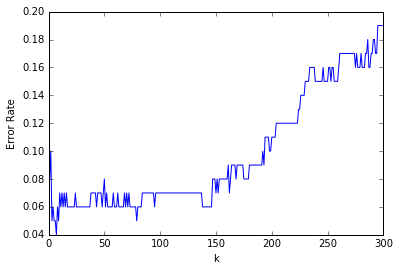

In [17]:
maxRange = 300 # DO NOT CHANGE THIS

errorRates = [datingClassTest(k) for k in range(1, maxRange)]

plt.plot(range(1, maxRange), errorRates)
plt.xlabel("k")
plt.ylabel("Error Rate")
plt.show()

## 예제 : 손글씨 인식
kNN으로 손글씨 숫자를 인식해봅시다!

데이터셋은 0 또는 1의 숫자로 이루어진 32 x 32 텍스트 파일들로 주어집니다. 각각의 파일을 읽어들여서, 벡터로 바꾸어주는 함수를 만들어봅시다.

In [18]:
def img2vector(filePath):
    returnVector =np. zeros((1, 1024))
    
    # store 0s/1s in 1*1024 numpy array
    with open(filePath, "r") as f:
        for i in range(32):
            line = f.readline()
            for j in range(32):
                returnVector[0, 32*i + j] = int(line[j])
            # END OF FOR - j
        # END OF FOR - i
    
    return returnVector

testVector = img2vector("./datasets/digits/testDigits/0_13.txt")
print(testVector)

[[ 0.  0.  0. ...,  0.  0.  0.]]


디렉토리 안의 파일을 순회하기 위해서 os 모듈의 listdir 메소드를 사용합니다. <br/>
각각의 파일은 <써진 숫자>_<#>.txt 로 주어집니다. <br/>
이제 kNN으로 손글씨를 얼마나 잘 인식할 수 있는지 확인해봅시다.

In [19]:
from os import listdir

def handwritingClassTest(k):
    ROOT_PATH = "./datasets/digits/"
    trainingLabels = []
    trainingFileList = listdir(ROOT_PATH + "trainingDigits")
    trainingSetSize = len(trainingFileList) # how many digits to train?
    
    trainingMatrix = np.zeros((trainingSetSize, 1024))
    
    for i in range(trainingSetSize):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split(".")[0] # .txt를 뗍니다
        classNumStr = int(fileStr.split("_")[0]) # _를 기준으로 잘라서, 써진 숫자가 무엇인지 알아냅니다.
        
        trainingLabels.append(classNumStr)
        
        trainingMatrix[i, :] = img2vector(ROOT_PATH + "trainingDigits/%s" % fileNameStr)
    # END OF FOR - i
    
    testFileList = listdir(ROOT_PATH + "testDIgits")
    errorCount = 0 # how many errors?
    testSetSize = len(testFileList) # how many digits to test?
    
    for i in range(testSetSize):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split(".")[0] # .txt를 뗍니다
        classNumStr = int(fileStr.split("_")[0]) # _를 기준으로 잘라서, 써진 숫자가 무엇인지 알아냅니다.
        
        if classNumStr != classify0(img2vector(ROOT_PATH + "testDigits/%s" % fileNameStr), trainingMatrix, trainingLabels, k):
            errorCount += 1
    # END OF FOR - i
    
    return errorCount / testSetSize

print(handwritingClassTest(3))
        

0.011627906976744186


1.2% 정도의 error rate를 얻었습니다. 1000개의 손글씨 숫자 중 988개를 맞춘다는 것이군요!

k를 변화시켜가면서 error rate의 변화를 알아봅시다. k = 3일때 최소가 되는군요.

<img src="./img/2_1.png"></img>

## 실습 1: Iris Dataset
<a href="./datasets/iris-train.txt" download>Training set 다운로드</a> (우클릭 후 다른이름으로 저장 하시면 됩니다.)<br/>
<a href="./datasets/iris-test.txt", download> Test set 다운로드</a> (편의상, training set과 test set을 나누어 놓았습니다.)<br/>

Iris Dataset은 multi-class classification문제에서 아주 기초가 되는 데이터셋입니다.

이 데이터셋은 iris의 sepal의 길이와 너비, petal의 길이와 너비를 측정해 놓은 데이터셋입니다.

class는 
1. Iris Setosa 
2. Iris Versicolour 
3. Iris Virginica

의 총 3개이며, 각각은 iris의 종을 나타냅니다.

4개의 열 각각은
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm

을 나타냅니다.

제공된 test set에 대해서 kNN을 적용시켜 보고, k값이 변함에 따라서 error rate이 어떻게 변하는지 알아봅시다.

## 실습 2: Yeast Dataset
<a href="./datasets/yeast-train.txt" download>Training set 다운로드</a> (우클릭 후 다른이름으로 저장 하시면 됩니다.)<br/>
<a href="./datasets/yeast-test.txt", download> Test set 다운로드</a> (편의상, training set과 test set을 나누어 놓았습니다.)<br/>

위의 데이터는 yeast에서 각 protein의 feature를 추출하여 수치화해놓은 데이터입니다.<br/>
1~8열은 각각 아래와 같은 feature의 수치를 나타낸 것이라고 하네요. <br/>
1. mcg: McGeoch's method for signal sequence recognition. 
2. gvh: von Heijne's method for signal sequence recognition. 
3. alm: Score of the ALOM membrane spanning region prediction program. 
4. mit: Score of discriminant analysis of the amino acid content of the N-terminal region (20 residues long) of mitochondrial and non-mitochondrial proteins. 
5. erl: Presence of "HDEL" substring (thought to act as a signal for retention in the endoplasmic reticulum lumen). Binary attribute. 
6. pox: Peroxisomal targeting signal in the C-terminus. 
7. vac: Score of discriminant analysis of the amino acid content of vacuolar and extracellular proteins. 
8. nuc: Score of discriminant analysis of nuclear localization signals of nuclear and non-nuclear proteins.

아무튼, 이러한 data와 kNN을 가지고 마지막 열에 제시된 <b>단백질의 localization site</b>를 예측하는 것이 목표입니다.

바로 코딩을 하기보다는, 파일을 열어 데이터를 들여다 보면서 어떻게 데이터를 다루어야 할지 생각해 보신 뒤에

Test set에 대해서 kNN을 적용시켜 보세요! 만약 성능이 좋지 못하다면, 그 이유를 생각해봅시다!
